<a href="https://colab.research.google.com/github/201815054/PythonStudy2/blob/master/%EB%8B%A8%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.datasets import imdb
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=500) #빈도기준으로 500개의 단어들만 포함 

17473536/17464789 [==============================] - 0s 0us/step


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Embedding, SimpleRNN,LSTM


In [7]:
print(x_train.shape,x_test.shape)
# 총 2만5천개의 문장이 들어가있음 

(25000,) (25000,)


In [8]:
x_train = x_train[:2500]
x_test = x_test[:2500]
y_train= y_train[:2500]
y_test = y_test[:2500]

In [12]:
len(x_train)

2500

In [13]:
x_train[:4] # 단어에 문장을 붙여서 토크나이징 한거.. 

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 

In [14]:
y_train[:4] # 긍정과 부정의 라벨이 붙어있음 

array([1, 0, 0, 1])

In [15]:
length = [len(line) for line in x_train] #문장을 길이를 하나하나 출력해봄

In [ ]:
length 

(array([  8.,  34.,  79.,  67.,  75., 103., 242., 262., 212., 158., 144.,
        117.,  94.,  94.,  70.,  71.,  41.,  49.,  50.,  47.,  37.,  35.,
         24.,  21.,  29.,  21.,  28.,  18.,  22.,  16.,  13.,  16.,  20.,
         11.,  10.,  10.,   9.,  11.,  18.,  11.,   3.,   7.,   8.,   7.,
          6.,   5.,   4.,   8.,   3.,   4.,   5.,   3.,   3.,   2.,   2.,
          3.,   5.,   3.,   2.,   2.,   5.,   9.,   1.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  16.  ,   32.13,   48.26,   64.39,   80.52,   96.65,  112.78,
         128.91,  145.04,  161.17,  177.3 ,  193.43,  209.56,  225.69,
         241.82,  257.95,  274.08,  290.21,  306.34,  322.47,  338.6 ,
         354.73,  370.86,  386.99,  403.12,  419.25,  435.38,  451.51,
         467.64,  483.77,  499.9 ,

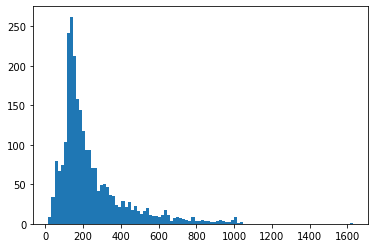

In [17]:
plt.hist(length,bins=100) #300정도가 많은거같음.  # 히스토그램을 그리기 떄문에 값이 array 값이 다르게 그려짐 

In [20]:
# db의 길이가 제각각이면 머신러닝을 할수없어서 길이를 통합시켜줘야함.
from tensorflow.keras.preprocessing.sequence import pad_sequences # 길이를 다 일치시킬수있음
x_train_seq= pad_sequences(x_train, maxlen=200)  #아까보니 길이가 200~ 300에서 가장 많이 분포되어있어서 200의 길이로 맞춰줌 # np.mean을 쓸 수도 있고 히스토그램으로 많이 분포된걸 확인 할 수도 있고 .. 
x_test_seq=pad_sequences(x_test,maxlen=200)

#padsequence는 긴것도 있고 짧은것도있는데 긴건 짜르고 앞에서 자를수도있고 뒤에서 자를수도있는데 디폴트값으로는 앞에서 자르고 뒤에값을 남기도록 되어있고 짧은문장이있으면 앞에 0을 채워서 길이를 같게해줌 

(2500, 200)

In [ ]:
print(x_train_seq.shape, x_test_seq.shape) #길이 맞춰진것 확인 

(2500, 200) (2500, 200)


In [ ]:
model = Sequential()
model.add(SimpleRNN(8, input_shape=(200,1)))
model.add(Dense(1,activation='sigmoid')) #긍부정이니까 1, sigmoid
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 80        
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
model.fit(x_train_seq,y_train, epochs=10, batch_size=64, validation_data=(x_test_seq,y_test))

Epoch 1/10
40/40 [==============================] - 13s 271ms/step - loss: 0.9357 - accuracy: 0.4860 - val_loss: 0.8430 - val_accuracy: 0.5308
Epoch 2/10
40/40 [==============================] - 11s 269ms/step - loss: 0.8464 - accuracy: 0.4964 - val_loss: 0.7864 - val_accuracy: 0.5256
Epoch 3/10
40/40 [==============================] - 11s 281ms/step - loss: 0.7935 - accuracy: 0.4968 - val_loss: 0.7518 - val_accuracy: 0.5204
Epoch 4/10
40/40 [==============================] - 11s 267ms/step - loss: 0.7573 - accuracy: 0.4932 - val_loss: 0.7283 - val_accuracy: 0.5184
Epoch 5/10
40/40 [==============================] - 11s 282ms/step - loss: 0.7333 - accuracy: 0.4920 - val_loss: 0.7136 - val_accuracy: 0.5104
Epoch 6/10
40/40 [==============================] - 11s 273ms/step - loss: 0.7159 - accuracy: 0.4920 - val_loss: 0.7031 - val_accuracy: 0.5052
Epoch 7/10
40/40 [==============================] - 18s 460ms/step - loss: 0.6971 - accuracy: 0.5044 - val_loss: 0.6944 - val_accuracy: 0.5028

In [ ]:
x_train_seq  #0으로 채운걸 확인 할 수있음.. 정수로되어있는데 저게 사실 단어임(크기를나타내는게아닌 단어기때문에 카테고리화 시켜야함.)
# 정수를 넣어줬을때 숫자로 인식해서 문제가있을수있기때문엫그럼.. 

array([[  5,  25, 100, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [207, 126, 110, ...,  30,   2, 133],
       [  2, 123,   6, ...,  95, 106,  15],
       [  2,   2,  34, ...,   2, 457, 158]], dtype=int32)

In [ ]:
from tensorflow.keras.utils import to_categorical

x_train_oh = to_categorical(x_train_seq) # 문장들을 원핫으로 바꿈
x_test_oh = to_categorical(x_test_seq)

In [ ]:
x_train_oh.shape

(2500, 200, 500)

In [ ]:
model = Sequential()
model.add(Embedding(500,16,input_length=200)) #원핫을하면 500차원으로 바뀌는데 200x500으로바껴서 그런식으로 바꾸지 않고 Embedding레이어를 주면 500단어가있고 16차원의 벡터로 바꾸라는것.. 시퀀스는200으로 설정해줬고
model.add(LSTM(8))
model.add(Dense(1,activation='sigmoid')) #긍부정이니까 1, sigmoid
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
hist = model.fit(x_train_seq.astype(float),y_train, epochs=10, batch_size=64, validation_data=(x_test_seq.astype(float),y_test))
#그냥 정수형태로 입력해주면 임베딩을 통해서 500차원의 원핫이아니라 16차원으로 줄어들어서 학습도 빨리됨.

Epoch 1/10
40/40 [==============================] - 7s 62ms/step - loss: 0.6919 - accuracy: 0.5196 - val_loss: 0.6920 - val_accuracy: 0.4948
Epoch 2/10
40/40 [==============================] - 2s 50ms/step - loss: 0.6862 - accuracy: 0.5524 - val_loss: 0.6852 - val_accuracy: 0.5332
Epoch 3/10
40/40 [==============================] - 2s 46ms/step - loss: 0.6564 - accuracy: 0.6436 - val_loss: 0.6318 - val_accuracy: 0.6104
Epoch 4/10
40/40 [==============================] - 2s 51ms/step - loss: 0.5769 - accuracy: 0.7368 - val_loss: 0.5680 - val_accuracy: 0.7568
Epoch 5/10
40/40 [==============================] - 2s 46ms/step - loss: 0.5395 - accuracy: 0.7660 - val_loss: 0.5650 - val_accuracy: 0.7452
Epoch 6/10
40/40 [==============================] - 2s 47ms/step - loss: 0.5243 - accuracy: 0.7804 - val_loss: 0.5454 - val_accuracy: 0.7640
Epoch 7/10
40/40 [==============================] - 2s 47ms/step - loss: 0.4822 - accuracy: 0.8044 - val_loss: 0.5287 - val_accuracy: 0.7708
Epoch 8/10
40